In [1]:
import get_data
import numpy as np
import pandas as pd

# getting a dataframe describing all images

the `rel_fp` column is the filepath of the image relative to the root of this directory (assuming you unzipped the data from box and left it in the folder named `MFGTMP_220317120003`)

In [2]:
df_images = get_data.load_images_df()
df_images.head()

,column,row,field,channel,rel_fp
0,B,3,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B03f02...
1,H,3,1,2,MFGTMP_220317120003/MFGTMP_220317120003_H03f01...
2,B,2,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B02f02...
3,F,1,2,2,MFGTMP_220317120003/MFGTMP_220317120003_F01f02...
4,A,1,7,1,MFGTMP_220317120003/MFGTMP_220317120003_A01f07...


# getting an image as a numpy array

In [3]:
example_img_path = df_images['rel_fp'].values[0]
img_arr = get_data.file_to_nparray(example_img_path)
img_arr.shape

(1104, 1104)

# Contrast stretching an image

In [5]:
from PIL import Image

stretched_img = get_data.stretch_img(img_arr)
im = Image.fromarray(stretched_img)
im.save("ex1.TIF")

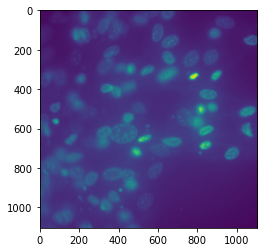

In [13]:
from matplotlib import pyplot as plt

plt.imshow(stretched_img)

# Contrast stretching all images for untreated / hydrogen peroxide (rows A, B, E, H)

In [16]:
img_paths = df_images[df_images['column'].isin(['A', 'B', 'E', 'H'])]['rel_fp'].values

for path in img_paths:
    img_arr = get_data.file_to_nparray(example_img_path)
    stretched_img = get_data.stretch_img(img_arr)
    im = Image.fromarray(stretched_img)
    new_path = "stretched/" + path[20:]
    print(new_path)
    im.save(new_path)

stretched/MFGTMP_220317120003_B03f02d4.TIF
stretched/MFGTMP_220317120003_H03f01d2.TIF
stretched/MFGTMP_220317120003_B02f02d4.TIF


KeyboardInterrupt: 